Introduction to Regression with Neural Networks in Tensorflow

In [2]:
#Import Tensorflow
import tensorflow as tf
print(tf.__version__)

2023-03-06 17:16:57.976705: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-03-06 17:16:58.130873: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2023-03-06 17:16:58.130897: I tensorflow/compiler/xla/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2023-03-06 17:16:58.686060: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory
2023-

2.11.0


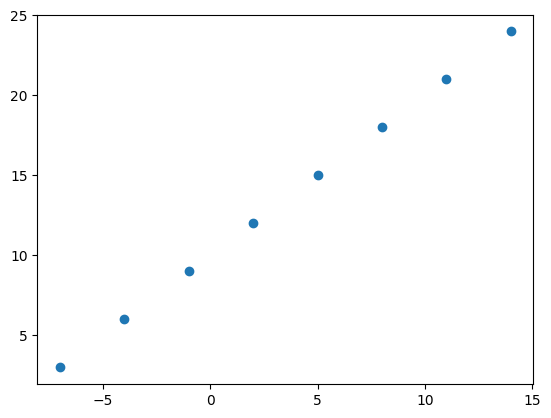

In [3]:
#Creating data to view and fit
import numpy as np
import matplotlib.pyplot as plt

#create features
X = np.array([-7.0,-4.0,-1.0,2.0,5.0,8.0,11.0,14.0])

#Create labels
y = np.array([3.0,6.0,9.0,12.0,15.0,18.0,21.0,24.0])

#Visualize it
plt.scatter(X,y)

In [4]:
y == X + 10

array([ True,  True,  True,  True,  True,  True,  True,  True])

Input and Output shapes

In [5]:
#Create a demo tensor for house prediction problem

house_info = tf.constant(["bedroom","bathroom","garage"])
house_price = tf.constant([939700])
house_info,house_price

2023-03-06 17:16:59.799940: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2023-03-06 17:16:59.799972: W tensorflow/compiler/xla/stream_executor/cuda/cuda_driver.cc:265] failed call to cuInit: UNKNOWN ERROR (303)
2023-03-06 17:16:59.799998: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (Suzy): /proc/driver/nvidia/version does not exist
2023-03-06 17:16:59.800325: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


(<tf.Tensor: shape=(3,), dtype=string, numpy=array([b'bedroom', b'bathroom', b'garage'], dtype=object)>,
 <tf.Tensor: shape=(1,), dtype=int32, numpy=array([939700], dtype=int32)>)

In [6]:
X[0],y[0]

(-7.0, 3.0)

In [7]:
X[1],y[1]

(-4.0, 6.0)

In [8]:
input_shape = X[0].shape
output_shape = y[0].shape
input_shape,output_shape,X[0].ndim
#x[0] has no shape as x[0] is a scalar variable and not a vector

((), (), 0)

In [9]:
#turn numpy arrays into tensors
X = tf.constant(X)
y = tf.constant(y)
X,y

(<tf.Tensor: shape=(8,), dtype=float64, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.])>,
 <tf.Tensor: shape=(8,), dtype=float64, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.])>)

In [10]:
input_shape = X[0].shape
input_shape = y[0].shape
input_shape,output_shape

(TensorShape([]), ())

In [11]:
#Steps in modelling with TensorFlow

#Set random seed
tf.random.set_seed(42)

#1.create a model using sequential API
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1) #go thru one layer
])
#2. Compile the model
model.compile(loss = tf.keras.losses.mae, #mean absolute error
              optimizer=tf.keras.optimizers.SGD(), #SGD is stochasitc gradient descent
              metrics=["mae"])
#3. Fit the model
#model.fit(X,y,epochs=5) #5 times to predict
model.fit(tf.expand_dims(X,axis=-1),y,epochs=5) #add extra dim in last axis of X

Epoch 1/5
1/1 [==============================] - 0s 223ms/step - loss: 17.9107 - mae: 17.9107
Epoch 2/5
1/1 [==============================] - 0s 6ms/step - loss: 17.6294 - mae: 17.6294
Epoch 3/5
1/1 [==============================] - 0s 4ms/step - loss: 17.3482 - mae: 17.3482
Epoch 4/5
1/1 [==============================] - 0s 5ms/step - loss: 17.0669 - mae: 17.0669
Epoch 5/5
1/1 [==============================] - 0s 4ms/step - loss: 16.7857 - mae: 16.7857


In [12]:
#Check out X and y
X,y

(<tf.Tensor: shape=(8,), dtype=float64, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.])>,
 <tf.Tensor: shape=(8,), dtype=float64, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.])>)

In [13]:
#making prediction
model.predict([17.0])

1/1 [==============================] - 0s 66ms/step


array([[-12.210811]], dtype=float32)

In [14]:
#should have been 27!!!

Improving the prediction part 1

We can improve our model by alternating the steps to make the model

1.Creating a model-> we can add more layers, increase the number of hidden units (neurons)

2.Compiling the model -> here we can change the optimization of perhaps the learning rate.

3.Fitting the model -> more epochs or more data

In [15]:
#lets rebuild the model with more epochs!

model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

model.compile(loss=tf.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"]
              )

model.fit(tf.expand_dims(X,axis=-1),y,epochs=100) #train for 100 steps


Epoch 1/100
1/1 [==============================] - 0s 185ms/step - loss: 10.5324 - mae: 10.5324
Epoch 2/100
1/1 [==============================] - 0s 6ms/step - loss: 10.3999 - mae: 10.3999
Epoch 3/100
1/1 [==============================] - 0s 5ms/step - loss: 10.2674 - mae: 10.2674
Epoch 4/100
1/1 [==============================] - 0s 5ms/step - loss: 10.1349 - mae: 10.1349
Epoch 5/100
1/1 [==============================] - 0s 5ms/step - loss: 10.0024 - mae: 10.0024
Epoch 6/100
1/1 [==============================] - 0s 4ms/step - loss: 9.8699 - mae: 9.8699
Epoch 7/100
1/1 [==============================] - 0s 5ms/step - loss: 9.7374 - mae: 9.7374
Epoch 8/100
1/1 [==============================] - 0s 4ms/step - loss: 9.6049 - mae: 9.6049
Epoch 9/100
1/1 [==============================] - 0s 4ms/step - loss: 9.4724 - mae: 9.4724
Epoch 10/100
1/1 [==============================] - 0s 6ms/step - loss: 9.3399 - mae: 9.3399
Epoch 11/100
1/1 [==============================] - 0s 4ms/step - l

so we got a mae of 6.9 compared to previous 12.6!

In [16]:
#lets predict!
model.predict([17.0])

1/1 [==============================] - 0s 45ms/step


array([[30.10154]], dtype=float32)

bit closer to 27!

In [17]:
#lets try and add more layers!
model = tf.keras.Sequential([
    #relu is rectified linear unit, ReLU(x) = max(0, x)
    tf.keras.layers.Dense(100,activation="relu"), #hidden layer with 100 units
    tf.keras.layers.Dense(1)
])
 
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])

model.fit(tf.expand_dims(X,axis=-1),y,epochs = 100)    

Epoch 1/100
1/1 [==============================] - 0s 233ms/step - loss: 13.5534 - mae: 13.5534
Epoch 2/100
1/1 [==============================] - 0s 4ms/step - loss: 13.0181 - mae: 13.0181
Epoch 3/100
1/1 [==============================] - 0s 4ms/step - loss: 12.4787 - mae: 12.4787
Epoch 4/100
1/1 [==============================] - 0s 4ms/step - loss: 11.9300 - mae: 11.9300
Epoch 5/100
1/1 [==============================] - 0s 4ms/step - loss: 11.3672 - mae: 11.3672
Epoch 6/100
1/1 [==============================] - 0s 4ms/step - loss: 10.7866 - mae: 10.7866
Epoch 7/100
1/1 [==============================] - 0s 4ms/step - loss: 10.1868 - mae: 10.1868
Epoch 8/100
1/1 [==============================] - 0s 5ms/step - loss: 9.5620 - mae: 9.5620
Epoch 9/100
1/1 [==============================] - 0s 4ms/step - loss: 8.9051 - mae: 8.9051
Epoch 10/100
1/1 [==============================] - 0s 7ms/step - loss: 8.2099 - mae: 8.2099
Epoch 11/100
1/1 [==============================] - 0s 7ms/step

In [18]:
#we get a mae of 3.68!
#lets predict!
model.predict([17.0])

1/1 [==============================] - 0s 56ms/step


array([[32.09754]], dtype=float32)

didnt fare well tho... previous one was better

In [19]:
#lets try once more!
model = tf.keras.Sequential([
    tf.keras.layers.Dense(100,activation="relu"),
    tf.keras.layers.Dense(1)
])

model.compile(
    loss=tf.keras.losses.mae,
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
    metrics=["mae"]
)
    
model.fit(tf.expand_dims(X,axis = -1),y,epochs=100)    

Epoch 1/100
1/1 [==============================] - 0s 360ms/step - loss: 13.4354 - mae: 13.4354
Epoch 2/100
1/1 [==============================] - 0s 4ms/step - loss: 12.5611 - mae: 12.5611
Epoch 3/100
1/1 [==============================] - 0s 4ms/step - loss: 11.7671 - mae: 11.7671
Epoch 4/100
1/1 [==============================] - 0s 4ms/step - loss: 11.1549 - mae: 11.1549
Epoch 5/100
1/1 [==============================] - 0s 4ms/step - loss: 10.5439 - mae: 10.5439
Epoch 6/100
1/1 [==============================] - 0s 4ms/step - loss: 9.9288 - mae: 9.9288
Epoch 7/100
1/1 [==============================] - 0s 4ms/step - loss: 9.3045 - mae: 9.3045
Epoch 8/100
1/1 [==============================] - 0s 5ms/step - loss: 8.6783 - mae: 8.6783
Epoch 9/100
1/1 [==============================] - 0s 4ms/step - loss: 8.0339 - mae: 8.0339
Epoch 10/100
1/1 [==============================] - 0s 4ms/step - loss: 7.3664 - mae: 7.3664
Epoch 11/100
1/1 [==============================] - 0s 4ms/step - l

In [20]:
#mae of 0.19!!!
#lets predict!
model.predict([17.0])

1/1 [==============================] - 0s 55ms/step


array([[26.955774]], dtype=float32)

Correctly predicted!!!
26.78 is the closest to 27!

<h3><b>Meanwhile remember on how to improve a deep model</b></h3>
<ul>
    <li>Adding layers</li>
    <li>Increase the number of hidden units</li>
    <li>Change the activation functions</li>
    <li>Change the optimisation function</li>
    <li>Change the learning rate</li>
</ul>

Learning rate is the most important!

<h3>Evaluating a model</h3>

key factor is visualisation!

In [21]:
#Make a bigger dataset
X = tf.range(-100,100,4)
X

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
        -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
        -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
         32,   36,   40,   44,   48,   52,   56,   60,   64,   68,   72,
         76,   80,   84,   88,   92,   96], dtype=int32)>

In [22]:
#make labels ie the formula we want our model to learn
y = X + 10
y

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
       -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
        14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
        66,  70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

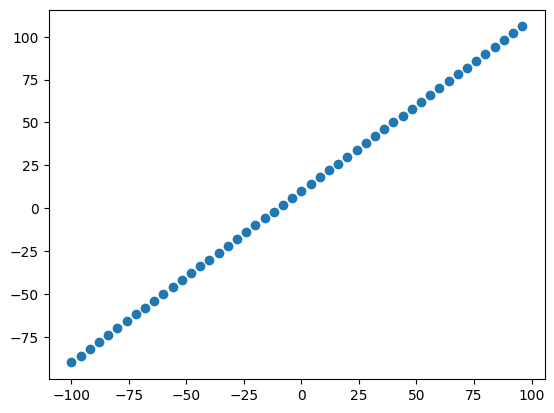

In [23]:
#lets visualise
import matplotlib.pyplot as plt
plt.scatter(X,y)

<h3><b>The 3 sets!</b></h3>
<ul>
<li>The training set - model learns from this (70-80 percent) </li>
<li>Validation set - model is tuned (10-15 percent)</li>
<li>Test Set - model is tested on this data (10-15 percent)</li>
</ul>

In [24]:
#checking the length of samples
len(X)

50

In [25]:
#spilt the data into test and train sets
X_train = X[:40] #first 40 samples
y_train = y[:40] #first 40 samples

X_test = X[40:] #last 40 samples
y_test = y[40:] #last 40 samples

len(X_train), len(X_test), len(y_test), len(y_train)

(40, 10, 10, 40)

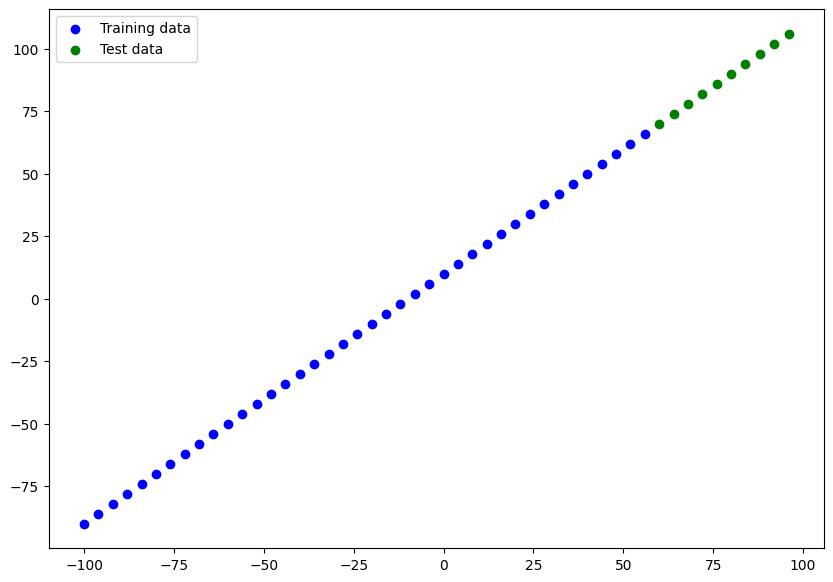

In [26]:
#visualising data
plt.figure(figsize=(10,7))
#plot training in blue
plt.scatter(X_train,y_train,c="b",label="Training data")
#plotting test data in green
plt.scatter(X_test,y_test,c="g",label="Test data")
#a legend
plt.legend()

In [27]:
#building neural network

#create model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1) #1 because we use 1 x value to predict one y value
])

#compile the model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])

#fit the model
#model.fit(X_train,y_train,epochs=100)

In [28]:
#visualising the model
#model.summary()

In [29]:
#we get error! first need to build or fit the data!
#building the model automatically
tf.random.set_seed(42)
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1,input_shape=[1],name="first_layer"),
    tf.keras.layers.Dense(1,input_shape=[1],name = "second_layer")
],name="model_1")
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics = ["mae"])

In [30]:
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 first_layer (Dense)         (None, 1)                 2         
                                                                 
 second_layer (Dense)        (None, 1)                 2         
                                                                 
Total params: 4
Trainable params: 4
Non-trainable params: 0
_________________________________________________________________


Calling summary() on our model shows us the layers it contains, the output shape and the number of parameters.

<li>Total params - total number of parameters in the model.</li>
<li>Trainable parameters - these are the parameters (patterns) the model can update as it trains.</li>
<li>Non-trainable parameters - these parameters aren't updated during training (this is typical when you bring in the already learned patterns from other models during transfer learning).</li>

In [31]:
model.fit(X_train,y_train,epochs=100,verbose=0)

In [32]:
#lets get summary
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 first_layer (Dense)         (None, 1)                 2         
                                                                 
 second_layer (Dense)        (None, 1)                 2         
                                                                 
Total params: 4
Trainable params: 4
Non-trainable params: 0
_________________________________________________________________


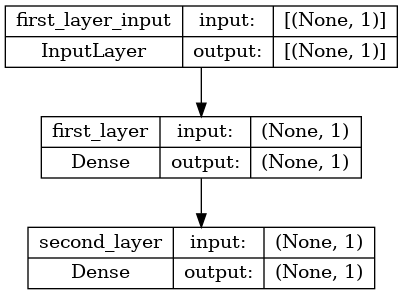

In [33]:
from tensorflow.keras.utils import plot_model
plot_model(model=model,show_shapes=True)

In [34]:
#visualising predictions
y_pred = model.predict(X_test)
y_pred #predictions

1/1 [==============================] - 0s 37ms/step


array([[ 76.321045],
       [ 81.29605 ],
       [ 86.27106 ],
       [ 91.24607 ],
       [ 96.22107 ],
       [101.19608 ],
       [106.17109 ],
       [111.146095],
       [116.12111 ],
       [121.096115]], dtype=float32)

In [35]:
y_test #ideal case

<tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

In [36]:
#plotting function!
def plot_predictions(train_data = X_train,
                     train_label = y_train,
                     test_data = X_test,
                     test_label = y_test,
                     predictions = y_pred):
    plt.figure(figsize=(10,7))
    #plot training data
    plt.scatter(train_data,train_label,c="b",label="Training Data")
    
    #plot ideal data
    plt.scatter(test_data,test_label,c="g",label="Ideal Data")
    
    #plot predicted plot
    plt.scatter(test_data,predictions,c="r",label="Predicted Data")

    plt.legend();   

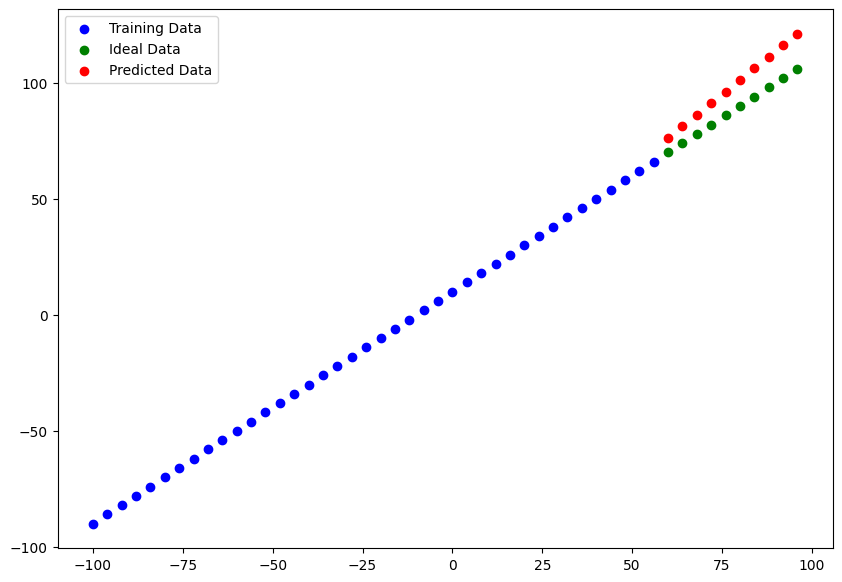

In [37]:
#calling fxn
plot_predictions(train_data=X_train,
                 train_label=y_train,
                 test_data=X_test,
                 test_label=y_test,
                 predictions=y_pred)


<h3>Regression evaluating metrics</h3>

MAE - mean absolute error - on average how wrong is my prediction (great starter metric)

MSE - mean square error - square the average errors (when larger errors are more significant than smaller errors)

HUBER - Combo of MSE and MAE, less sensitive to outliers than MSE

In [38]:
model.evaluate(X_test,y_test)

1/1 [==============================] - 0s 89ms/step - loss: 10.7086 - mae: 10.7086


[10.708578109741211, 10.708578109741211]

In [39]:
y_pred

array([[ 76.321045],
       [ 81.29605 ],
       [ 86.27106 ],
       [ 91.24607 ],
       [ 96.22107 ],
       [101.19608 ],
       [106.17109 ],
       [111.146095],
       [116.12111 ],
       [121.096115]], dtype=float32)

In [40]:
y_test

<tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

In [41]:
#calculating mae
mae = tf.keras.losses.mean_absolute_error(y_test,y_pred)
mae

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([13.407373, 11.081579, 10.      , 10.249214, 11.688428, 14.31765 ,
       18.17109 , 23.146095, 28.121109, 33.096115], dtype=float32)>

In [42]:
#we are getting a tensor as output as the shapes are not equal
#lets try it out!
y_test.shape, y_pred.shape

(TensorShape([10]), (10, 1))

In [43]:
y_pred.squeeze().shape

(10,)

In [44]:
#now lets try
mae = tf.keras.losses.mean_absolute_error(y_pred=y_pred.squeeze(), y_true=y_test)
mae

<tf.Tensor: shape=(), dtype=float32, numpy=10.708578>

In [45]:
#calculate the mean square error!
mse = tf.keras.losses.mean_squared_error(y_pred = y_pred.squeeze(),y_true=y_test)
mse

<tf.Tensor: shape=(), dtype=float32, numpy=122.51643>

In [46]:
#Make a fxn to reuse mae and mse
def mae(y_true,y_pred):
    return tf.keras.losses.mean_absolute_error(y_true=y_true,y_pred=tf.squeeze(y_pred));

def mse(y_true,y_pred):
    return tf.keras.losses.mean_squared_error(y_true = y_true, y_pred = tf.squeeze(y_pred));


<h3>Running experiments to improve the model</h3>

<li>Get more data</li>
<li>Make larger model (hidden layers or units)</li>
<li>Train for longer</li>


lets build 3 models
1. model_1: same as original, train for 100 epochs
2. model_2: 2 layers, train for 100 epochs
3. model_3: 2 layers, train for 500 epochs

In [47]:
#model_1
tf.random.set_seed(42)

model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

model_1.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])

model_1.fit(tf.expand_dims(X_train,axis=-1),y_train,epochs=100)


Epoch 1/100
2/2 [==============================] - 0s 6ms/step - loss: 57.4916 - mae: 57.4916
Epoch 2/100
2/2 [==============================] - 0s 3ms/step - loss: 23.0507 - mae: 23.0507
Epoch 3/100
2/2 [==============================] - 0s 3ms/step - loss: 10.5885 - mae: 10.5885
Epoch 4/100
2/2 [==============================] - 0s 3ms/step - loss: 13.1168 - mae: 13.1168
Epoch 5/100
2/2 [==============================] - 0s 4ms/step - loss: 12.1794 - mae: 12.1794
Epoch 6/100
2/2 [==============================] - 0s 3ms/step - loss: 9.4244 - mae: 9.4244
Epoch 7/100
2/2 [==============================] - 0s 4ms/step - loss: 8.5673 - mae: 8.5673
Epoch 8/100
2/2 [==============================] - 0s 4ms/step - loss: 9.0567 - mae: 9.0567
Epoch 9/100
2/2 [==============================] - 0s 4ms/step - loss: 18.7190 - mae: 18.7190
Epoch 10/100
2/2 [==============================] - 0s 4ms/step - loss: 10.1056 - mae: 10.1056
Epoch 11/100
2/2 [==============================] - 0s 3ms/step -

1/1 [==============================] - 0s 32ms/step


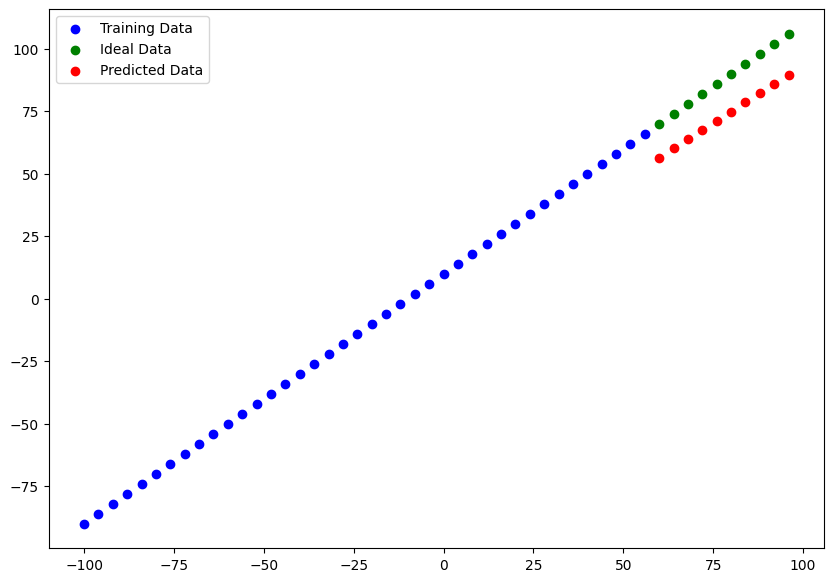

In [48]:
#make and plot preds for model_1
y_preds_1 = model_1.predict(X_test)
plot_predictions(predictions=y_preds_1)


In [49]:
#calulate metrics
mae_1 = mae(y_true=y_test,y_pred=y_preds_1)
mse_1 = mse(y_true=y_test,y_pred=y_preds_1)
mae_1,mse_1

(<tf.Tensor: shape=(), dtype=float32, numpy=14.981799>,
 <tf.Tensor: shape=(), dtype=float32, numpy=225.30435>)

In [50]:
#model 2
model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(1),
    tf.keras.layers.Dense(1)
])

model_2.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.SGD(),
                metrics=["mae"])

model_2.fit(tf.expand_dims(X_train,axis=-1),y_train,epochs=100)    

Epoch 1/100
2/2 [==============================] - 0s 3ms/step - loss: 36.0825 - mae: 36.0825
Epoch 2/100
2/2 [==============================] - 0s 4ms/step - loss: 10.1113 - mae: 10.1113
Epoch 3/100
2/2 [==============================] - 0s 4ms/step - loss: 22.5512 - mae: 22.5512
Epoch 4/100
2/2 [==============================] - 0s 4ms/step - loss: 12.9128 - mae: 12.9128
Epoch 5/100
2/2 [==============================] - 0s 3ms/step - loss: 14.2024 - mae: 14.2024
Epoch 6/100
2/2 [==============================] - 0s 4ms/step - loss: 11.3549 - mae: 11.3549
Epoch 7/100
2/2 [==============================] - 0s 4ms/step - loss: 12.3842 - mae: 12.3842
Epoch 8/100
2/2 [==============================] - 0s 4ms/step - loss: 10.9361 - mae: 10.9361
Epoch 9/100
2/2 [==============================] - 0s 3ms/step - loss: 38.8212 - mae: 38.8212
Epoch 10/100
2/2 [==============================] - 0s 3ms/step - loss: 26.4328 - mae: 26.4328
Epoch 11/100
2/2 [==============================] - 0s 4ms/

In [51]:
y_pred_2 = model_2.predict(X_test)
y_pred_2

1/1 [==============================] - 0s 35ms/step


array([[ 88.34596 ],
       [ 94.112854],
       [ 99.879745],
       [105.646645],
       [111.413536],
       [117.18043 ],
       [122.94733 ],
       [128.71422 ],
       [134.4811  ],
       [140.248   ]], dtype=float32)

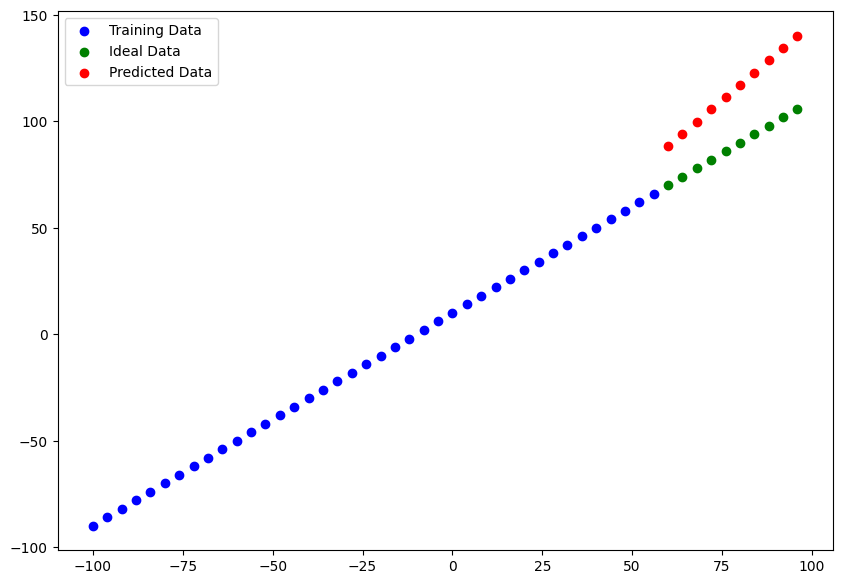

In [52]:
plot_predictions(predictions=y_pred_2)

In [53]:
mae_2 = mae(y_true=y_test,y_pred=y_pred_2)
mse_2 = mse(y_true=y_test,y_pred=y_pred_2)
mae_2,mse_2

(<tf.Tensor: shape=(), dtype=float32, numpy=26.296982>,
 <tf.Tensor: shape=(), dtype=float32, numpy=717.287>)

In [54]:
#model 3
model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(1),
    tf.keras.layers.Dense(1),
])

model_3.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.SGD(),
                metrics=["mae"])

model_3.fit(tf.expand_dims(X_train,axis=-1),y_train,epochs=500)

Epoch 1/500
2/2 [==============================] - 0s 4ms/step - loss: 24.3984 - mae: 24.3984
Epoch 2/500
2/2 [==============================] - 0s 3ms/step - loss: 17.9738 - mae: 17.9738
Epoch 3/500
2/2 [==============================] - 0s 3ms/step - loss: 25.7098 - mae: 25.7098
Epoch 4/500
2/2 [==============================] - 0s 3ms/step - loss: 22.3534 - mae: 22.3534
Epoch 5/500
2/2 [==============================] - 0s 3ms/step - loss: 13.4090 - mae: 13.4090
Epoch 6/500
2/2 [==============================] - 0s 4ms/step - loss: 10.7781 - mae: 10.7781
Epoch 7/500
2/2 [==============================] - 0s 4ms/step - loss: 11.7174 - mae: 11.7174
Epoch 8/500
2/2 [==============================] - 0s 4ms/step - loss: 10.7297 - mae: 10.7297
Epoch 9/500
2/2 [==============================] - 0s 3ms/step - loss: 36.0983 - mae: 36.0983
Epoch 10/500
2/2 [==============================] - 0s 3ms/step - loss: 23.9823 - mae: 23.9823
Epoch 11/500
2/2 [==============================] - 0s 4ms/

In [55]:
y_pred_3 = model_3.predict(X_test)

1/1 [==============================] - 0s 43ms/step


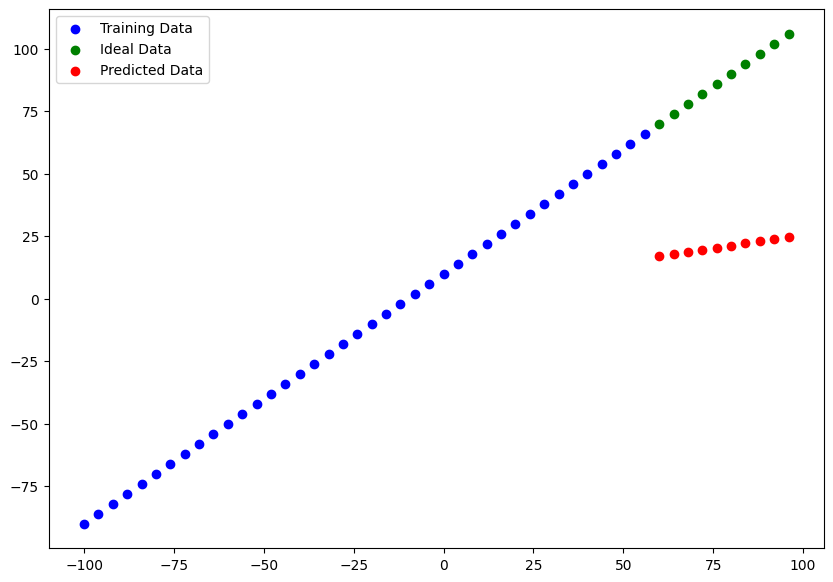

In [56]:
plot_predictions(predictions=y_pred_3)

In [57]:
#metrics
mae_3 = mae(y_pred=y_pred_3,y_true=y_test)
mse_3 = mse(y_pred=y_pred_3,y_true=y_test)
mae_3,mse_3

(<tf.Tensor: shape=(), dtype=float32, numpy=67.13343>,
 <tf.Tensor: shape=(), dtype=float32, numpy=4589.357>)

<h3>Comparing the results!</h3>

In [58]:
import pandas as pd
model_results = [["model_1",mae_1.numpy(),mse_1.numpy()],
                 ["model_2",mae_2.numpy(),mse_2.numpy()],
                 ["model_3",mae_3.numpy(),mse_3.numpy()]]
all_results = pd.DataFrame(model_results,columns=["model","mae","mse"])
all_results

,model,mae,mse
0,model_1,14.981799,225.304352
1,model_2,26.296982,717.286987
2,model_3,67.133430,4589.356934


Model 2 is the best!

Experiment! Experiment! Experiment!

One great habit is to track the results of the experiments

Can use TensorBoard

Can use Weights and Biases

<h2>Saving the models!</h2>

2 main formats 

<li>SavedModel</li>
<li>HDF5</li>


In [59]:
#savedmodel format
model_2.save("model_2_saved_model_format")

INFO:tensorflow:Assets written to: model_2_saved_model_format/assets


INFO:tensorflow:Assets written to: model_2_saved_model_format/assets


In [60]:
#hdf5 format
model_2.save("model_2_hdf5_format.h5")

<h2>Loading the Models</h2>

In [61]:
loaded_saved_model_model_2 = tf.keras.models.load_model("model_2_saved_model_format")
loaded_saved_model_model_2.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 1)                 2         
                                                                 
 dense_9 (Dense)             (None, 1)                 2         
                                                                 
Total params: 4
Trainable params: 4
Non-trainable params: 0
_________________________________________________________________


In [62]:
#compare model_2 predictions with saved model predictions
model_2_preds = model_2.predict(X_test)
loaded_saved_model_model_2_preds = loaded_saved_model_model_2.predict(X_test)
#mae(y_true=y_test,y_pred=model_2_preds) == mae(y_true=y_test,y_pred=loaded_saved_model_model_2_preds)
model_2_preds == loaded_saved_model_model_2_preds

1/1 [==============================] - 0s 41ms/step


array([[ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True]])

In [63]:
#loading the h5 model
loaded_h5_model_2 = tf.keras.models.load_model("model_2_hdf5_format.h5")
loaded_h5_model_2.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 1)                 2         
                                                                 
 dense_9 (Dense)             (None, 1)                 2         
                                                                 
Total params: 4
Trainable params: 4
Non-trainable params: 0
_________________________________________________________________


In [64]:
#check the preds of h5 format
model_2_preds = model_2.predict(X_test)
loaded_h5_model_2_preds = loaded_h5_model_2.predict(X_test)
model_2_preds == loaded_h5_model_2_preds

1/1 [==============================] - 0s 35ms/step


array([[ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True]])

<h2>A larger example</h2>

In [65]:
#import required libs
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt

In [66]:
#read in the insurance dataset
insurance = pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv")
insurance

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [67]:
#create numerical encoding for non-numerical columns
#use get_dummies() to turn into one hot encoding
insurance_one_hot = pd.get_dummies(insurance)
insurance_one_hot

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,1,0,0,1,0,0,0,1
1,18,33.770,1,1725.55230,0,1,1,0,0,0,1,0
2,28,33.000,3,4449.46200,0,1,1,0,0,0,1,0
3,33,22.705,0,21984.47061,0,1,1,0,0,1,0,0
4,32,28.880,0,3866.85520,0,1,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1333,50,30.970,3,10600.54830,0,1,1,0,0,1,0,0
1334,18,31.920,0,2205.98080,1,0,1,0,1,0,0,0
1335,18,36.850,0,1629.83350,1,0,1,0,0,0,1,0
1336,21,25.800,0,2007.94500,1,0,1,0,0,0,0,1


In [72]:
#Create X and y values(features and labels)
X = insurance_one_hot.drop("charges",axis=1)
y = insurance_one_hot["charges"]

#create training and test sets
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

#build a neural network (sort of model_2)
tf.random.set_seed(42)
insurance_model = tf.keras.Sequential([
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1),
])

insurance_model.compile(loss=tf.keras.losses.mae,
                        optimizer=tf.keras.optimizers.SGD(),
                        metrics=["mae"])

insurance_model.fit(X_train,y_train,epochs=100)

Epoch 1/100
34/34 [==============================] - 0s 2ms/step - loss: 8695.2354 - mae: 8695.2354
Epoch 2/100
34/34 [==============================] - 0s 1ms/step - loss: 7829.8203 - mae: 7829.8203
Epoch 3/100
34/34 [==============================] - 0s 1ms/step - loss: 7602.0908 - mae: 7602.0908
Epoch 4/100
34/34 [==============================] - 0s 1ms/step - loss: 7685.8701 - mae: 7685.8701
Epoch 5/100
34/34 [==============================] - 0s 1ms/step - loss: 7726.8887 - mae: 7726.8887
Epoch 6/100
34/34 [==============================] - 0s 1ms/step - loss: 7654.4136 - mae: 7654.4136
Epoch 7/100
34/34 [==============================] - 0s 1ms/step - loss: 7560.7549 - mae: 7560.7549
Epoch 8/100
34/34 [==============================] - 0s 1ms/step - loss: 7719.6260 - mae: 7719.6260
Epoch 9/100
34/34 [==============================] - 0s 1ms/step - loss: 7470.3730 - mae: 7470.3730
Epoch 10/100
34/34 [==============================] - 0s 1ms/step - loss: 7586.8418 - mae: 7586.8418

In [73]:
#check results 
insurance_model.evaluate(X_test,y_test)

9/9 [==============================] - 0s 1ms/step - loss: 6907.3125 - mae: 6907.3125


[6907.3125, 6907.3125]

In [75]:
y_train.median(),y_train.mean()
#looks like our model is off by 6900 units!

(9575.4421, 13346.089736364485)

Lets try 3 things
<li>Increasing the number of layers</li>
<li>Increasing the number of units in each layer (except the output layer)</li>
<li>Changing the optimizer (ADAM)</li>


In [80]:
tf.random.set_seed(42)
insurance_model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1),
])
insurance_model_2.compile(loss=tf.keras.losses.mae,
                          optimizer=tf.keras.optimizers.Adam(),
                          metrics=["mae"])

insurance_model_2.fit(X_train,y_train,epochs=100,verbose=0)    


In [81]:
insurance_model_2.evaluate(X_test,y_test)
#much better!

9/9 [==============================] - 0s 1ms/step - loss: 5012.1597 - mae: 5012.1597


[5012.15966796875, 5012.15966796875]

In [87]:
#lets try one more model!
tf.random.set_seed(42)
insurance_model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1),
])
insurance_model_3.compile(loss=tf.keras.losses.mae,
                          optimizer=tf.keras.optimizers.Adam(),
                          metrics=["mae"])
history=insurance_model_3.fit(X_train,y_train,epochs=500,verbose=0)
    

In [88]:
insurance_model_3.evaluate(X_test,y_test)
#even lower!

9/9 [==============================] - 0s 1ms/step - loss: 3165.3176 - mae: 3165.3176


[3165.317626953125, 3165.317626953125]

Text(0.5, 0, 'epochs')

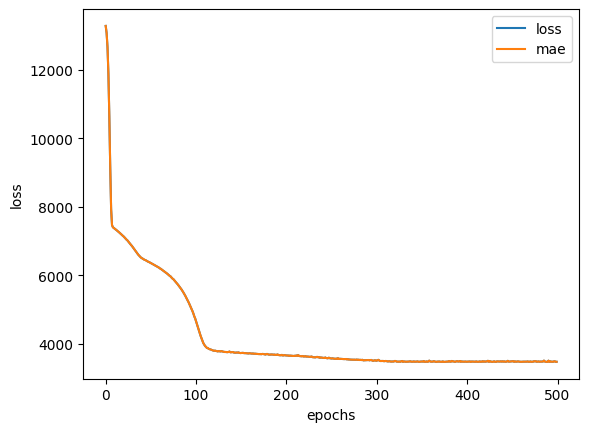

In [89]:
#Plot history loss curve or training curve
pd.DataFrame(history.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs")

In [ ]:
#but how long to train for?
#use Early stopping callbacks

In [101]:
tf.random.set_seed(42)
callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=3)
insurance_model_4 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1),
])
insurance_model_4.compile(loss=tf.keras.losses.mae,
                          optimizer=tf.keras.optimizers.Adam(),
                          metrics=["mae"])
insurance_model_4.fit(X_train,y_train,epochs=1000,callbacks=[callback])  


Epoch 1/1000
34/34 [==============================] - 1s 2ms/step - loss: 13291.1611 - mae: 13291.1611
Epoch 2/1000
34/34 [==============================] - 0s 2ms/step - loss: 13139.1826 - mae: 13139.1826
Epoch 3/1000
34/34 [==============================] - 0s 2ms/step - loss: 12811.2227 - mae: 12811.2227
Epoch 4/1000
34/34 [==============================] - 0s 2ms/step - loss: 12147.0322 - mae: 12147.0322
Epoch 5/1000
34/34 [==============================] - 0s 1ms/step - loss: 11018.0029 - mae: 11018.0029
Epoch 6/1000
34/34 [==============================] - 0s 1ms/step - loss: 9560.3145 - mae: 9560.3145
Epoch 7/1000
34/34 [==============================] - 0s 1ms/step - loss: 8213.3662 - mae: 8213.3662
Epoch 8/1000
34/34 [==============================] - 0s 2ms/step - loss: 7542.0576 - mae: 7542.0576
Epoch 9/1000
34/34 [==============================] - 0s 1ms/step - loss: 7426.4199 - mae: 7426.4199
Epoch 10/1000
34/34 [==============================] - 0s 2ms/step - loss: 7405.2

In [102]:
#ran for 142 epochs only
insurance_model_4.evaluate(X_test,y_test)

9/9 [==============================] - 0s 1ms/step - loss: 3628.0906 - mae: 3628.0906


[3628.090576171875, 3628.090576171875]

<h2>Preprocessing Data</h2>
Normalisation and Standarisation

Normalisation changes the values of columns into a common scale likely 0 to 1

In [107]:
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

insurance = pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv")
insurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [125]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder

# Create column transformer (this will help us normalize/preprocess our data)
ct = make_column_transformer(
    (MinMaxScaler(), ["age", "bmi", "children"]), # get all values between 0 and 1
    (OneHotEncoder(handle_unknown="ignore"), ["sex", "smoker", "region"])
)

# Create X & y
X = insurance.drop("charges", axis=1)
y = insurance["charges"]

# Build our train and test sets (use random state to ensure same split as before)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit column transformer on the training data only (doing so on test data would result in data leakage)
ct.fit(X_train)

# Transform training and test data with normalization (MinMaxScalar) and one hot encoding (OneHotEncoder)
X_train_normal = ct.transform(X_train)
X_test_normal = ct.transform(X_test)

In [131]:
#lets build the model on this dataset!
tf.random.set_seed(42)
insurance_model_5 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1),
])

insurance_model_5.compile(loss=tf.keras.losses.mae,
                          optimizer=tf.keras.optimizers.Adam(),
                          metrics="mae")

insurance_model_5.fit(X_train_normal,y_train,epochs = 500)

Epoch 1/500
34/34 [==============================] - 0s 2ms/step - loss: 13342.3125 - mae: 13342.3125
Epoch 2/500
34/34 [==============================] - 0s 1ms/step - loss: 13330.9453 - mae: 13330.9453
Epoch 3/500
34/34 [==============================] - 0s 1ms/step - loss: 13305.2148 - mae: 13305.2148
Epoch 4/500
34/34 [==============================] - 0s 1ms/step - loss: 13254.3809 - mae: 13254.3809
Epoch 5/500
34/34 [==============================] - 0s 1ms/step - loss: 13167.2881 - mae: 13167.2881
Epoch 6/500
34/34 [==============================] - 0s 1ms/step - loss: 13033.1680 - mae: 13033.1680
Epoch 7/500
34/34 [==============================] - 0s 1ms/step - loss: 12841.9805 - mae: 12841.9805
Epoch 8/500
34/34 [==============================] - 0s 1ms/step - loss: 12583.7627 - mae: 12583.7627
Epoch 9/500
34/34 [==============================] - 0s 2ms/step - loss: 12248.4307 - mae: 12248.4307
Epoch 10/500
34/34 [==============================] - 0s 2ms/step - loss: 11835.06

In [132]:
insurance_model_5.evaluate(X_test_normal,y_test)

9/9 [==============================] - 0s 1ms/step - loss: 3160.6082 - mae: 3160.6082


[3160.608154296875, 3160.608154296875]

model 3<br>
9/9 [==============================] - 0s 1ms/step - loss: 3165.3176 - mae: 3165.3176

model 5<br>
9/9 [==============================] - 0s 1ms/step - loss: 3160.7485 - mae: 3160.7485
